In [1]:
# Dependencies
#from config import (census_key, gkey)
import gmaps
import numpy as np
import pandas as pd
import requests
import time
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
#import city baby name data
baby_name_original = pd.read_csv(
    "../Data/StateNames.csv", dtype="object", encoding="utf-8")
#display result
baby_name_original.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [8]:
baby_name_original["Count"] = baby_name_original.Count.astype(float)
baby_name_original['date_conv'] = pd.to_datetime(baby_name_original.Year)

In [16]:
baby_name_original.dtypes

Id                   object
Name                 object
Year                 object
Gender               object
State                object
Count               float64
date_conv    datetime64[ns]
dtype: object

In [34]:
#baby_name_original.groupby((baby_name_original.index.date_conv//10)*10).count()
#baby_name_original.groupby(baby_name_original.date_conv).sum().head()
baby_name_original.index = baby_name_original['date_conv'] 
decadeGB = baby_name_original.groupby((baby_name_original.index.year//10)*10).sum()
decadeGB


,Count
date_conv,
1910,13592430.0
1920,21375928.0
1930,19783425.0
1940,27779123.0
1950,37547865.0
1960,35405445.0
1970,29239167.0
1980,32351751.0
1990,33311835.0


In [35]:
decade = decadeGB.index
totalNames = decadeGB["Count"]

decadeGroupDF = pd.DataFrame({"Decade": decade, "Total Names": totalNames})
decadeGroupDF = decadeGroupDF.reset_index(drop=True)
decadeGroupDF

,Decade,Total Names
0,1910,13592430.0
1,1920,21375928.0
2,1930,19783425.0
3,1940,27779123.0
4,1950,37547865.0
5,1960,35405445.0
6,1970,29239167.0
7,1980,32351751.0
8,1990,33311835.0
9,2000,33046752.0


<BarContainer object of 11 artists>

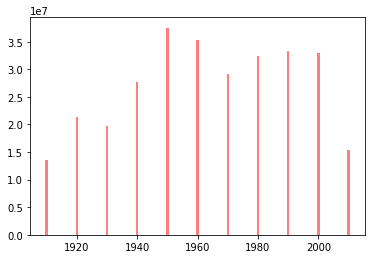

In [42]:
x_axis = decadeGroupDF.Decade
y_axis = decadeGroupDF['Total Names']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
#plt.ylim(0, max(y_axis)+50000)

In [22]:
BabyNameGB = baby_name_original.groupby("Name")
BabyName = BabyNameGB.count().index
NameCount = BabyNameGB["Count"].sum()

TopNameGB = pd.DataFrame({"Name": BabyName, "Popularity": NameCount
                             })


In [23]:
#TopNameGB.sort_values(by=['Popularity'])

TopName = TopNameGB.sort_values(by=['Popularity'], ascending=False)

TopName.head(10)

,Name,Popularity
Name,,
James,James,4957166.0
John,John,4845414.0
Robert,Robert,4725713.0
Michael,Michael,4312975.0
William,William,3839236.0
Mary,Mary,3740495.0
David,David,3562278.0
Richard,Richard,2534949.0
Joseph,Joseph,2485220.0
